<a href="https://colab.research.google.com/github/KlGamers/Probabilidad-y-Estadistica/blob/main/U1/U1_O3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unidad 1

*Practica 3: Tablas de frecuencia.*

Facilitador: José Gabriel Rodriguez Rivas

Alumno: Sebastián Villa Bernal

Tabla de distribución de frecuencias (datos individuales): 


,Edad,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
0,18,1,0.010000,1,0.010000
1,19,2,0.020000,3,0.030000
2,20,3,0.030000,6,0.060000
3,21,2,0.020000,8,0.080000
4,22,2,0.020000,10,0.100000
5,23,2,0.020000,12,0.120000
6,24,1,0.010000,13,0.130000
7,25,4,0.040000,17,0.170000
8,26,1,0.010000,18,0.180000
9,27,2,0.020000,20,0.200000



Valor de n = 100
Numero de intervalos = 7

Tabla de distribución de frecuencias (por intervalos): 


,Clase,Frec,Frec Rel,Frec Porc,Frec Ac,Frec Rel Ac,Frec Porc Ac
0,"(17.948, 25.429]",17,0.170000,17.000000,17,0.170000,17.000000
1,"(25.429, 32.857]",17,0.170000,17.000000,34,0.340000,34.000000
2,"(32.857, 40.286]",18,0.180000,18.000000,52,0.520000,52.000000
3,"(40.286, 47.714]",11,0.110000,11.000000,63,0.630000,63.000000
4,"(47.714, 55.143]",16,0.160000,16.000000,79,0.790000,79.000000
5,"(55.143, 62.571]",6,0.060000,6.000000,85,0.850000,85.000000
6,"(62.571, 70.0]",15,0.150000,15.000000,100,1.000000,100.000000


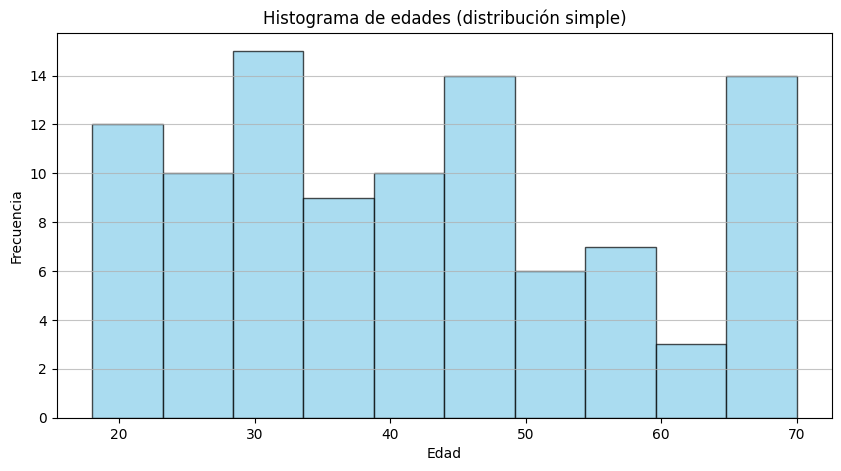

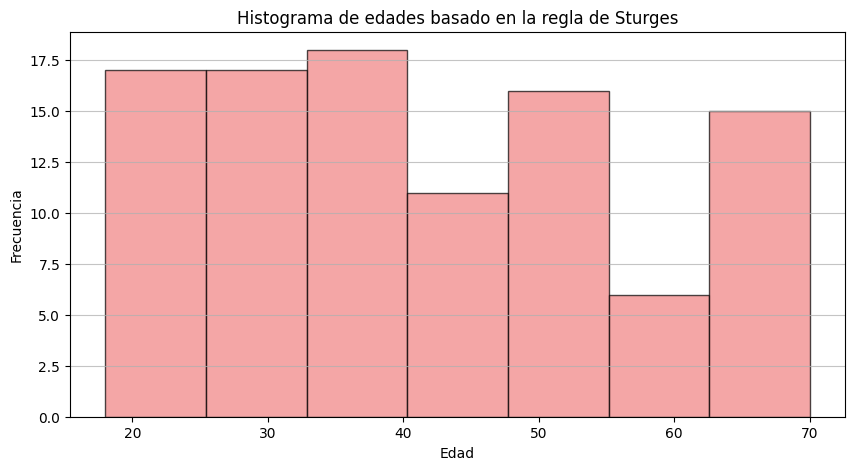

In [1]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

e = []

for i in range(100):
  na=random.randint(18,70)
  e.append(na)

df = pd.DataFrame(e, columns=['Edad'])

tf = df['Edad'].value_counts().reset_index()
tf.columns = ['Edad', 'Frecuencia Absoluta']
tf = tf.sort_values(by='Edad').reset_index(drop=True)

total_datos = len(df)
tf['Frecuencia Relativa'] = tf['Frecuencia Absoluta'] / total_datos
tf['Frecuencia Acumulada'] = tf['Frecuencia Absoluta'].cumsum()
tf['Frecuencia Relativa Acumulada'] = tf['Frecuencia Relativa'].cumsum()

print("Tabla de distribución de frecuencias (datos individuales): ")
display(tf.style.background_gradient(cmap='Blues').set_properties(**{'font-size': '10pt', 'font-family': 'Segoe UI'}))

n = len(e)
K = int(1 + math.log2(n))
print(f"\nValor de n = {n}\nNumero de intervalos = {K}")

tabla_frecuencia = pd.cut(df['Edad'], bins=K).value_counts(sort=False).reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase').reset_index(drop=True)

tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()

print("\nTabla de distribución de frecuencias (por intervalos): ")
display(tabla_frecuencia.style.background_gradient(cmap='Greens').set_properties(**{'font-size': '10pt', 'font-family': 'Segoe UI'}))

plt.figure(figsize=(10, 5))
plt.hist(df['Edad'], alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histograma de edades (distribución simple)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df['Edad'], bins=K, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Histograma de edades basado en la regla de Sturges')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()